

**For reference: https://www.datacamp.com/tutorial/decision-tree-classification-python**

In this assignment, we will go together to learn how to train a decision tree using the Machine Learning tool [Scikit-learn](https://scikit-learn.org/stable/), then use it to resolve the classification problem - one of the most popular problem in Machine Learning.

There are 4 parts in this assignments:
* Read and understand the dataframe
* Train the model with Scikit-learn
  * Prepare the data for training
  * Train and visualize the decision tree
* Evaluate the trained model
* Optional



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn for tree
from sklearn import tree

In [2]:
%%capture
!wget -O weather.csv https://webpages.charlotte.edu/tnguy248/itcs3153/weather.csv

# 1. Read the dataframe
In this assignment, we will use a modified dataset from [Kaggle](https://www.kaggle.com/datasets/ananthr1/weather-prediction) to train a decision tree.

The weather.csv consists 1281 rows (or samples). Each row inclues 5 columns (4 features and 1 output):
* precipitation: All forms in which water falls on the land surface and open water bodies as rain, sun.
* temp_max: Maximum Temperature
* temp_min: Minimum Temperature
* wind: Wind speed
* weather: this is the target label that we want to predict (rain or sun)


## 1.1. Load data file
Now, the dataset has been downloaded and saved into the file weather.csv. Please use the <code>read_csv</code> function from the pandas library to load the dataset, then save it into the <code>df</code> variable.


####<font color="green">**Exercise 1.a: Load dataframe using read_csv**</font>

In [3]:
#write code here:
df = pd.read_csv('weather.csv')

####<font color="green">**Exercise 1.b: Print some content of the dataset**</font>
Print the first or last 5 rows.



In [4]:
#write code here:
print(df.head())

   precipitation  temp_max  temp_min  wind weather
0           10.9      10.6       2.8   4.5    rain
1            0.8      11.7       7.2   2.3    rain
2           20.3      12.2       5.6   4.7    rain
3            1.3       8.9       2.8   6.1    rain
4            2.5       4.4       2.2   2.2    rain


####<font color="green">**Exercise 1.c: Summary stats of dataset**</font>
Generate the descriptive statistics of the data.


In [5]:
#write code here:
print(df.describe())

       precipitation     temp_max     temp_min         wind
count    1281.000000  1281.000000  1281.000000  1281.000000
mean        3.281499    16.655738     8.465574     3.313427
std         6.939005     7.226486     4.870935     1.435877
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    11.100000     5.000000     2.300000
50%         0.000000    15.600000     8.300000     3.000000
75%         3.300000    22.200000    12.200000     4.100000
max        55.900000    35.600000    18.300000     9.500000


## 1.2. Understanding the data
A balanced dataset makes training a model easier because it helps prevent the model from becoming biased towards one class. Let's check to see whether this dataset is balanced or not.

This below code will count all samples with rain weather, then print the result.

In [6]:

df_rain = df[df['weather'] == 'rain']
df_rain.shape[0]


641

####<font color="green">**Exercise 2.a: Count the sun weather**</font>

In [7]:
#write code here:
# Count the number of samples with 'sun' weather
sun_count = df[df['weather'] == 'sun'].shape[0]

# Print the result
print(f"Number of samples with 'sun' weather: {sun_count}")


Number of samples with 'sun' weather: 640


####<font color="green">**Exercise 2.b: Plot the weather counts**</font>
It's better if we can visualize it.
Now, extract the weather column from the dataset, call <code>value_counts()</code> to get the frequency of each distinct row, then save into <code>df_weather</code> variable. After that, we can use <code>plot()</code> function to plot the new dataset.

Read more: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

Weather frequency:
weather
rain    641
sun     640
Name: count, dtype: int64


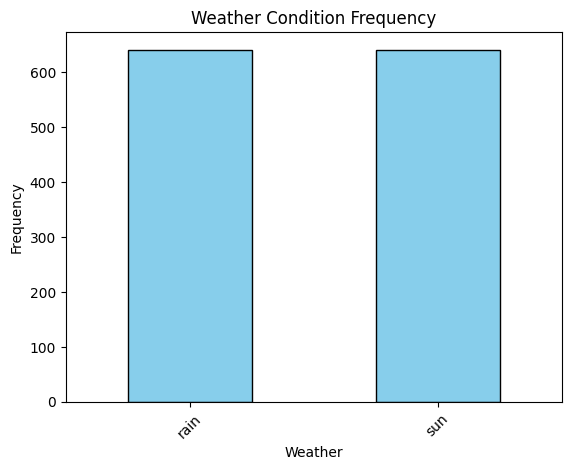

In [8]:
#write code here:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the 'weather' column and get the frequency of each distinct value
df_weather = df['weather'].value_counts()

# Print the frequency DataFrame
print("Weather frequency:")
print(df_weather)

# Plot the frequencies
df_weather.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Weather Condition Frequency')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()





# 2. Train the model with scikit-learn
Scikit-Learn, also known as sklearn is a python library to implement machine learning models and statistical modelling. Through scikit-learn, we can implement various machine learning models for regression, classification, clustering, and statistical tools for analyzing these models. It also provides functionality for dimensionality reduction, feature selection, feature extraction, ensemble techniques, and inbuilt datasets. We will be looking into these features one by one.

Read more: https://www.analyticsvidhya.com/blog/2021/07/15-most-important-features-of-scikit-learn/

## 2.1. Prepare the data for training
Now, we need to split the original dataset into 2 sub-dataset: training and testing. Training data is the subset of original data that is used to train the machine learning model, whereas testing data is used to check the accuracy of the model. The training dataset is generally larger in size compared to the testing dataset. (https://www.javatpoint.com/train-and-test-datasets-in-machine-learning)



Thanks to scikit-learn, we can do it easily with <code>train_test_split</code> function.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

####<font color="green">**Exercise 3: Split dataset to train and test sets**</font>
In this task, we need to:
split the dataset into training and testing data. In this case, use 20% of the dataset for the test set and use random_state = 42

  <font color="red">Note: If you don't set or set this param wrong, you will lose the points in this and later tasks</font>
  


Read more: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
from sklearn.model_selection import train_test_split


#write code here:
from sklearn.model_selection import train_test_split


X = df.iloc[:, :4]


y = df.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to verify
print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


"""
Extract the first 4 column and save it to input variable X
Extract the last column and save it to output variable y
Using train_test_split to split dataset into train and test sets
"""

Training feature set shape: (1024, 4)
Testing feature set shape: (257, 4)
Training labels shape: (1024,)
Testing labels shape: (257,)


'\nExtract the first 4 column and save it to input variable X\nExtract the last column and save it to output variable y\nUsing train_test_split to split dataset into train and test sets\n'

## 2.2. Train and visualize the decision tree
This is the pseudo code to build a decision tree from scratch.

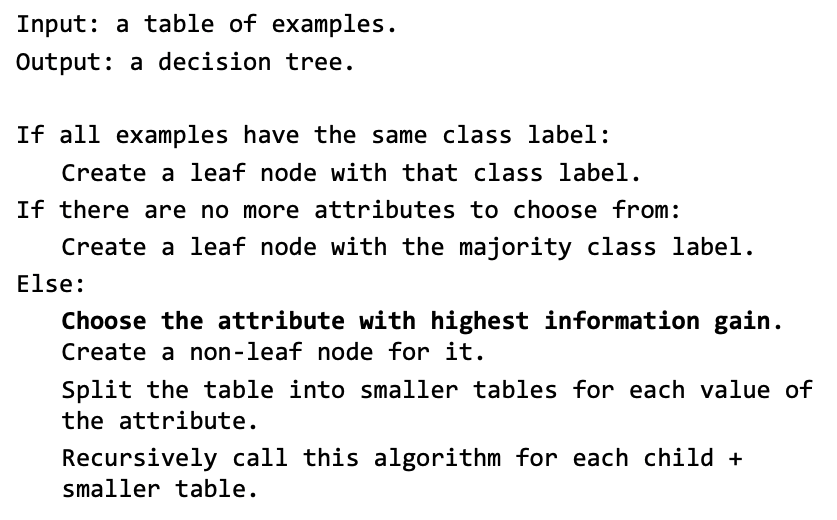

But in this assignment, we can use scikit-learn library to train a decision tree in short time.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

####<font color="green">**Exercise 4: Train a decision tree**</font>

1. Using <code>tree.DecisionTreeClassifier</code> to decalare a tree with <code>max_depth=6</code>, save it to <code>clf</code> variable. The hyperparameter <code>max_depth</code> controls the overall complexity of a decision tree. This hyperparameter allows to get a trade-off between an under-fitted and over-fitted decision tree.
2. Then use <code>fit</code> ([link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit)) to train the tree with train datasets. Using <code>X_train</code> and <code>y_train</code> as input.



In [10]:
#write code here:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(max_depth=6)


clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=6)

####<font color="green">**Exercise 5: Visualize the tree (10 pts)**</font>

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#examples-using-sklearn-tree-plot-tree

Display the tree using <code>tree.plot_tree</code> function with params:
* filled = True
* class_names = ["Rain", "Sun"]
* feature_names: the name of all features in each row, except the output

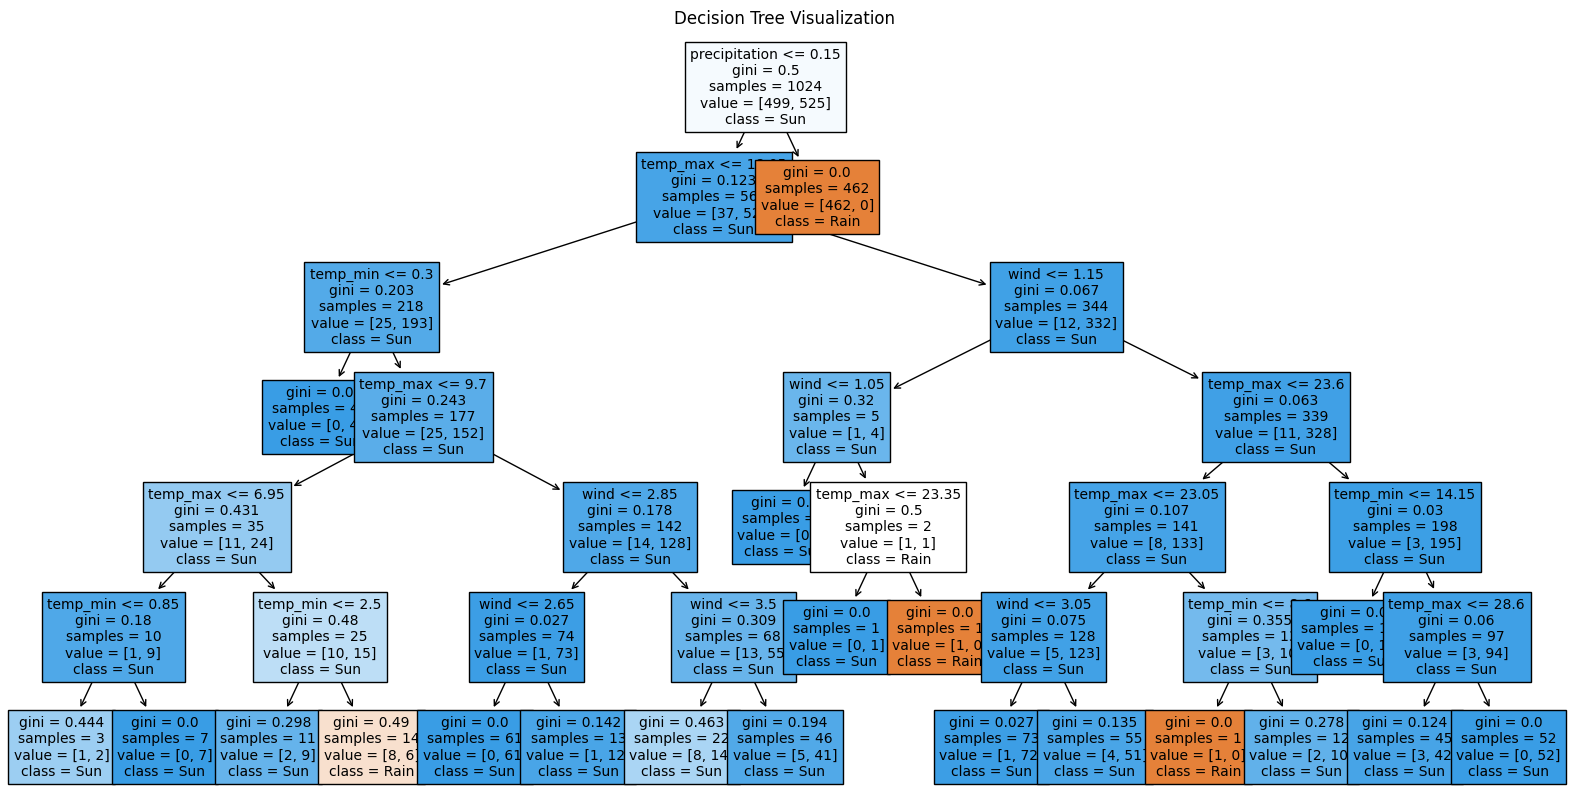

In [11]:
#write code here:
from sklearn import tree
import matplotlib.pyplot as plt

# List of feature names (assuming you have 4 features)
feature_names = X.columns.tolist()

# List of class names
class_names = ["Rain", "Sun"]

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(
    clf,
    filled=True,
    feature_names=feature_names,
    class_names=class_names,
    fontsize=10
)
plt.title('Decision Tree Visualization')
plt.show()




# 3. Evaluation

To check the trained tree is good or bad, we need to calculate the accuracy of that model with the test dataset.

####<font color="green">**Exercise 6: Evaluate the model**</font>
In this task, we will:
* Run <code>clf.predict()</code> ([link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict)) with <code>X_test</code> as input to predict the weather, then save them to <code>y_hat</code>.

* Using <code>accuracy_score</code> ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)) to get the accuracy rate of this model in the test data, than assign it to <code>score</code> variable. The input for this function are the predicted output <code>y_hat</code> and the real output <code>y_test</code>.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [12]:
from sklearn.metrics import accuracy_score
#write code here:
from sklearn.metrics import accuracy_score


y_hat = clf.predict(X_test)


score = accuracy_score(y_test, y_hat)


print(f"Accuracy Score: {score:.2f}")

"""
Using the trained tree to get the predict output from test set and then the accuracy score
"""



Accuracy Score: 0.97


'\nUsing the trained tree to get the predict output from test set and then the accuracy score\n'

# 4. Model Analysis (Extra credit)


####<font color="green">**Exercise 7: Access particular node of the Decision Tree**</font>

* Case 1: precipitation = 2, temp_max=20, temp_min=5, wind=10
* Case 2: precipitation = 0, temp_max=20, temp_min=5, wind=1.1


<font color="green">**Your answer:**</font>
* Case 1:
* Case 2:

In [13]:
#write code here:
import numpy as np

# Define feature values for each case
case_1 = np.array([[2, 20, 5, 10]])  # precipitation=2, temp_max=20, temp_min=5, wind=10
case_2 = np.array([[0, 20, 5, 1.1]])  # precipitation=0, temp_max=20, temp_min=5, wind=1.1

# Predict using the trained decision tree classifier
prediction_case_1 = clf.predict(case_1)
prediction_case_2 = clf.predict(case_2)

# Print the predictions
print(f"Case 1 prediction: {prediction_case_1[0]}")
print(f"Case 2 prediction: {prediction_case_2[0]}")


Case 1 prediction: rain
Case 2 prediction: sun


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


####<font color="green">**Exercise 7.2:(OPTIONAL)  Train a new decision tree without max_depth param. Output the new accuracy score.**</font>


<font color="green">**Your answer:**</font>

In [ ]:
#write code here:
# Use this code box to train a new tree without max_depth and print the new score.



**Note the new score is lower than the old one.**

The issue in the new model is likely overfitting. The accuracy score is lower than the previous model, suggesting that the decision tree without a specified max_depth is fitting the training data too closely and not generalizing well to new, unseen data. This behavior is typical of overfitting.